<a href="https://colab.research.google.com/github/ilafmakke/data_preprocessing/blob/main/data_preprpcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

upload insurance.csv# New Section

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Load the Airbnb listings data
uploaded=files.upload()
# Get the list of uploaded filenames
uploaded_filenames = list(uploaded.keys())
import pandas as pd
# Print the list of filenames
print(uploaded_filenames)
uploaded_csv_content = uploaded[uploaded_filenames[0]]
# Prompt user for file path
filename = uploaded_filenames[0]
df = pd.read_csv(filename)
# Display basic information about the dataset
print(df.info())

Saving insurance.csv to insurance (2).csv
['insurance (2).csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1335 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None


In [6]:
df.isna().sum()

age         1
sex         0
bmi         4
children    0
smoker      0
region      3
expenses    0
dtype: int64

**Lectures Notes**

*   Data Have Two Shape ( Numerical,Categorical )
*   Model Only understant Numerical Data
*   So We have to shape our data to be in the form of numerical
*   numerical not mean the data just simply numerical ( Numer With meaning ) - { Male => 1 , Female => 0} that's mean we represent male with value One And Female with value Zero
*   So data need to be prprocessed firist to be ready for doing mathematical calculation and get model equation


**Preprocessing can be done with steps one after one**


*   First We Need To Fix Null values
*   This Simply Called Encoding

1 - **Label Encoding** Feature Have Meaning , Ex : Grades

2 - **One Hot Encoding** Features Not Figured Ex : Colors , Gender


1 - Fixing Null Numerical Values With Mean or Median based on

**outliers**
2 - Fixing Categrical Values With Mode

Scale Values
1 - StandardScaler , MinMaxScaler

In [7]:
df.describe()


,age,bmi,children,expenses
count,1337.000000,1334.000000,1338.000000,1338.000000
mean,39.201945,30.651724,1.094918,13270.422414
std,14.053988,6.092351,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.675000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0,yes,southwest,16884.92
1,18.0,male,33.8,1,no,southeast,1725.55
2,28.0,male,33.0,3,no,southeast,4449.46
3,33.0,male,22.7,0,no,northwest,21984.47
4,32.0,male,28.9,0,no,northwest,3866.86


In [9]:
# Calculate the mean of the column
mean_value = df['age'].mean()

# Fill null values with the mean
df['age'].fillna(mean_value, inplace=True)

mean_value = df['bmi'].mean()
# Fill null values with the mean
df['bmi'].fillna(mean_value, inplace=True)


In [10]:
mode=df['region'].mode()[0]  # Using [0] to get the first mode in case there are multiple modes

# Fill null values with the mode
df['region'].fillna(mode, inplace=True)

In [11]:
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**Encoding data# New Section**

In [12]:
df.head(1)


,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0,yes,southwest,16884.92


#
Sex , Smoker , region ( Categorical Data need to be transfered to numerical values )
**Label Encoding, One Hot Encoding**
https://spotintelligence.com/2023/09/04/label-encoding/

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])


In [15]:
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19.0,0,27.9,0,1,southwest,16884.92
1,18.0,1,33.8,1,0,southeast,1725.55
2,28.0,1,33.0,3,0,southeast,4449.46
3,33.0,1,22.7,0,0,northwest,21984.47
4,32.0,1,28.9,0,0,northwest,3866.86


In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# New Section
Encode region with One Hot Encoding , And Drop One Of The Columns , reflect That On DataFrame (df)


**All Of That Can be Done Using get_dummies
From The Lecture By Default Encode Value With True And False , Must Be Like This**

 **df = pd.get_dummies(df,drop_first=True,dtype='i')**

In [17]:
df = pd.get_dummies(df,drop_first=True,dtype='i') # dtype='iThis parameter sets the data type of the encoded columns to integer (int)
df
# drop region and replace by region_northwest

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19.0,0,27.9,0,1,16884.92,0,0,1
1,18.0,1,33.8,1,0,1725.55,0,1,0
2,28.0,1,33.0,3,0,4449.46,0,1,0
3,33.0,1,22.7,0,0,21984.47,1,0,0
4,32.0,1,28.9,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50.0,1,31.0,3,0,10600.55,1,0,0
1334,18.0,0,31.9,0,0,2205.98,0,0,0
1335,18.0,0,36.9,0,0,1629.83,0,1,0
1336,21.0,0,25.8,0,0,2007.95,0,0,1


# New Section
Scalling Data
*   First We Need To Isolate The Output ( Need To Predict it
*   Scall Data Using (StandardScaler,MinMaxScaler)



In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Should I Use StandardScaler Or MinMaxScaler?
The best approach is often to experiment with both options and see which one works best for your specific dataset and machine learning problem.

Compare the validation scores of your model when using each scaler and choose the one that gives the best results.

If you have a lot of outliers in your data, you may want to use the RobustScaler instead of these two.
https://forecastegy.com/posts/standardscaler-vs-minmaxscaler-difference/

In [21]:
scl = MinMaxScaler()


In [18]:
y_true = df['expenses']
x = df.drop(['expenses'],axis=1) #The axis=1 parameter indicates that we are dropping a column (1 refers to columns, 0 refers to rows).
x

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19.0,0,27.9,0,1,0,0,1
1,18.0,1,33.8,1,0,0,1,0
2,28.0,1,33.0,3,0,0,1,0
3,33.0,1,22.7,0,0,1,0,0
4,32.0,1,28.9,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50.0,1,31.0,3,0,1,0,0
1334,18.0,0,31.9,0,0,0,0,0
1335,18.0,0,36.9,0,0,0,1,0
1336,21.0,0,25.8,0,0,0,0,1


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
lr = LinearRegression()


In [22]:
lr.fit(x,y_true)
y_predict = lr.predict(x)
print('CC , r2 score' ,r2_score(y_true,y_predict))

CC , r2 score 0.750654964912336


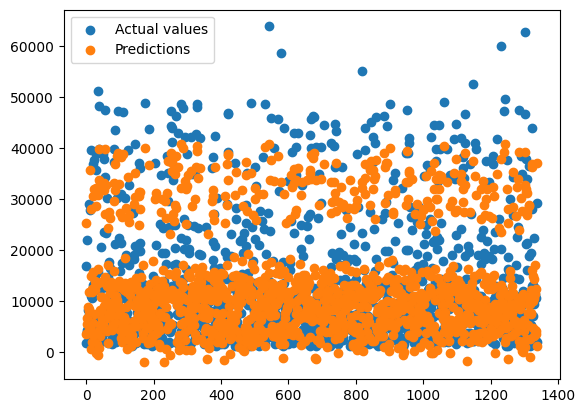

In [23]:
plt.scatter(range(len(x)), y_true, label = 'Actual values')#he x-axis represents the indices of the data points, allowing you to see the relationship between the indices and the corresponding values
#The range(len(x)) generates [0, 1, 2, 3] as the x-axis values.
plt.scatter(range(len(x)), y_predict, label = 'Predictions')
plt.legend()
plt.show()

In [24]:
x_scale = scl.fit_transform(x)

lr.fit(x_scale,y_true)
y_predict = lr.predict(x_scale)
print('CC , r2 score' ,r2_score(y_true,y_predict))

CC , r2 score 0.750654964912336


**using polynomial Featutres To Enhance Results**# New Section

In [25]:
from sklearn.preprocessing import PolynomialFeatures


In [26]:
poly = PolynomialFeatures()
x_poly = poly.fit_transform(x_scale)

lr.fit(x_poly,y_true)
y_predict = lr.predict(x_poly)
print('CC , r2 score' ,r2_score(y_true,y_predict))

CC , r2 score 0.8428804273273456


In [ ]:
#a revoire

for  d in range(1,20):
  poly=PolynomialFeatures(degree=d)
  x_poly=poly.fit_transform(x_scale)

  lr_poly=LinearRegression()
  lr_poly.fit(x_poly,y_true)
  preds_poly=lr_poly.predict(x_poly)
  print("after poly",r2_score(y_true,preds_poly))
  print("befor poly",r2_score(y_true,y_predict))
  print("degre=",d)


after poly 0.750654964912336
befor poly 0.8428804273273456
degre= 1
after poly 0.8428804273273456
befor poly 0.8428804273273456
degre= 2
after poly 0.8571368444639361
befor poly 0.8428804273273456
degre= 3
after poly 0.8691881342996876
befor poly 0.8428804273273456
degre= 4
after poly 0.8986821594487242
befor poly 0.8428804273273456
degre= 5
after poly 0.9316982334395408
befor poly 0.8428804273273456
degre= 6
after poly 0.9541061607501912
befor poly 0.8428804273273456
degre= 7
after poly 0.9784784971309874
befor poly 0.8428804273273456
degre= 8
after poly 0.9915412306835277
befor poly 0.8428804273273456
degre= 9
after poly 0.9950284190303588
befor poly 0.8428804273273456
degre= 10
after poly 0.9986661994205346
befor poly 0.8428804273273456
degre= 11
after poly 0.9986661968965465
befor poly 0.8428804273273456
degre= 12
after poly 0.9986669610979916
befor poly 0.8428804273273456
degre= 13
after poly 0.9986671159714098
befor poly 0.8428804273273456
degre= 14


In [ ]:
x
y_true


In [ ]:
y_predict